<center>
<img src="logo.png" height="900"> 
</center>

В этой тетрадке мы поговорим про мощь средних и доверительные интервалы для них.


#  Мощь средних 

In [1]:
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

## 1. Ещё раз о квантилях

In [2]:
norm_rv = stats.norm(loc=0, scale=1)  # задали генератор 
norm_rv.ppf(0.025) # нашли квантиль

-1.9599639845400545

Число $-1.96$ это квантиль уровня $2.5\%$. Давайте нарисуем его на графике плотности. 

(-1.959963984540054, 1.959963984540054)

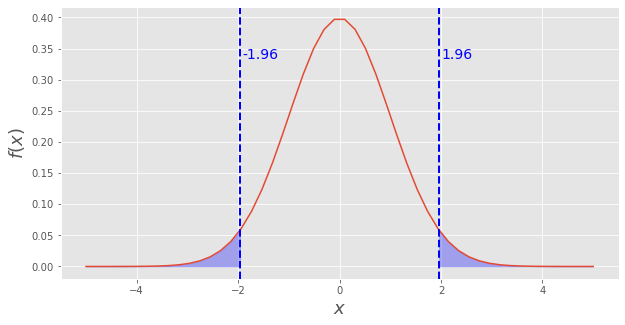

In [3]:
def norm_conf_int(alpha, mean_hat=0, std_hat=1, margin=5):
    """
        Строит 95% асимптотически-нормальный доверительный интервал
    """
    
    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = stats.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = stats.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)
    
    for i in [left, right]: 
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)
        
        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)
        
        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = stats.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right
    
alpha = 0.05
norm_conf_int(0.05)

## 2. Мощь средних и асимптотические доверительные интервалы

__Ещё раз, ещё раз.__ Среднее хорошо тем, что есть ЦПТ, которая говорит нам, как оно распределено

$$ 
\bar x \overset{asy}{\sim} N \left(\mu, \frac{\sigma^2}{n}\right),
$$ 

На основе этого мы можем построить для среднего доверительный интервал.

## 2.1 Ульяна смотрит игру престолов

Ульяна любит сериалы! Конечно же, Игра Престолов не обошла её стороной. Она смотрит её каждый день. Пусть $X$ - число серий, которое Ульяна просмотрела за день. Так как число серий - счётчик, можно предположить, что $X \sim Poiss(\lambda)$, где $\lambda$ - интенсивность просмотра. Не забыли же ещё, что случайные величины счётчики можно (но не обязательно) моделировать с помощью распределения Пуассона? 

Ульяне стало интересно с какой интенсивностью она смотрит сериалы, и теперь она хочет построить для $\lambda$ оценку методом моментов, а после доверительный интервал для неё. 

In [4]:
# Ульяна рассказала о том, сколько серий посмотрела на этой неделе
x = [5, 7, 8, 2, 3, 1, 2]

$$
\hat \lambda = \bar x
$$

In [5]:
lam_hat = np.mean(x)
lam_hat

4.0

$$
\hat \lambda \overset{asy}{\sim} N \left(\lambda, \frac{\hat \lambda}{n} \right).
$$

$$
\hat \lambda \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat \lambda}{n}}
$$

In [6]:
norm_rv = stats.norm(loc=0, scale=1)

alpha = 0.05                       # задаём уровень значимости 
z_alpha = norm_rv.ppf(1 - alpha/2) # из нормального распределения автоматически посчитался квантиль

lam_hat = np.mean(x)               # нашли оценку параметра 
lam_se = np.sqrt(lam_hat/len(x))   # оценили стандартное отклонение 

# по формулам посчитали границы
lam_left = lam_hat - z_alpha*lam_se
lam_right = lam_hat + z_alpha*lam_se

# Помимо самого интервала нас интересует его ширина
print(f"Доверительный интервал [{lam_left:.3}, {lam_right:.3}] ширины { lam_right - lam_left:.3}")

Доверительный интервал [2.52, 5.48] ширины 2.96


По аналогии можно построить асимптотический доверительный интервал с помощью уже готовой функции. Единственное, что от нас потребуется: вычислить среднее и дисперсию. 

In [7]:
lam_hat = np.mean(x)             # нашли оценку параметра 
lam_se = np.sqrt(lam_hat/len(x)) # оценили стандартное отклонение 

stats.norm.interval(0.95, loc=lam_hat, scale=lam_se)

(2.518406490932507, 5.481593509067493)

Можно построить этот же доверительный интервал на картинке с помощью функции, которую мы написали в самом начале тетрадки. 

(2.518406490932507, 5.481593509067493)

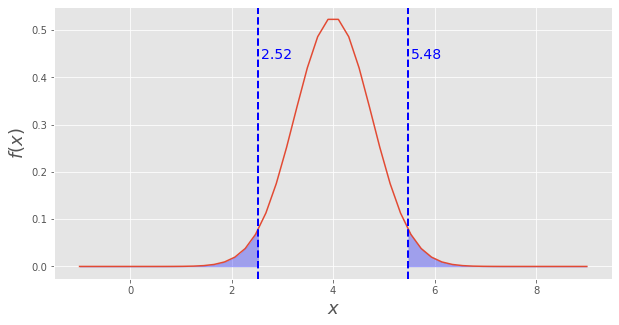

In [8]:
alpha = 0.05
norm_conf_int(alpha, mean_hat=lam_hat, std_hat=lam_se)

## 2.2  Подруга Ульяны

Теперь Таня и Ульяна смотрят сериалы вдвоём. Каждая со своей интенсивностью $\lambda_i$. 

Ульяна считает, что она опережает Таню по интенсивности просмотра. Нужно построить доверительный интервал для разности $\lambda_1 - \lambda_2$ и понять, правда ли, что Ульяна впереди. Для простоты будем считать, что Ульяна и Таня смотрят сериалы независимо друг от друга. 

In [9]:
x = [5, 7, 8, 2, 3, 1, 2]  # Ульяна
y = [1, 1, 9, 1, 2, 2, 2]  # Таня 

$$
\hat \lambda_1 - \hat \lambda_2 \overset{asy}{\sim} N \left( \lambda_1 - \lambda_2, \frac{\hat \lambda_1}{n_1} + \frac{\hat \lambda_2}{n_2} \right).
$$

$$
\hat{\lambda}_1 - \hat{\lambda}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{\lambda}_1}{n_1} + \frac{\hat{\lambda}_2}{n_2}}
$$

In [10]:
alpha = 0.05 # задаём уровень значимости 

z_alpha = norm_rv.ppf(1 - alpha/2) # квантиль для нормального

diff = np.mean(x) - np.mean(y)
diff_se = np.sqrt(np.mean(x)/len(x) + np.mean(y)/len(y))

left = diff - z_alpha*diff_se
right = diff + z_alpha*diff_se

# Помимо самого интервала нас интересует его ширина
print(f"Доверительный интервал [{left:.3}, {right:.3}] ширины {right - left:.3}")

Доверительный интервал [-0.47, 3.33] ширины 3.8


Доверительный интервал покрывает ноль. Это означает, что Ульяна и Таня смотрят сериал с одинаковой интенсивностью.

Угадайте как часто мы сделаем ошибку, утверждая это? Правильно! В $5\%$ случаев. 

Фактически мы с вами только что проверили на уровне значимости $5\%$ гипотезу о равенстве средних. Зафиксируйте это в голове и вспомните, когда мы чётко и по шагам формализуем процедуру проверки гипотез. 

(-0.47044607117023984, 3.3275889283130966)

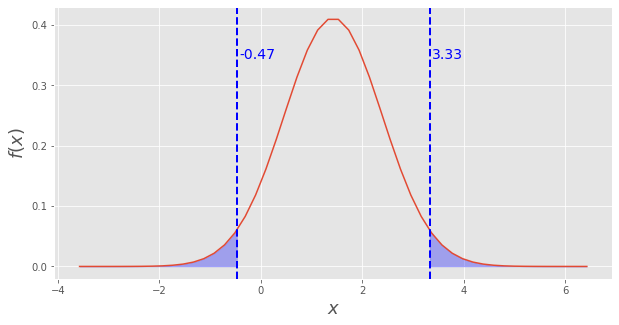

In [11]:
norm_conf_int(alpha, mean_hat=diff, std_hat=diff_se)